In [1]:
# library 로딩하기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# 외부데이터 읽어오기
# 예제데이터 : seaborn에서 제공하는 diamonds
diamonds = pd.read_csv("구급출동.csv")

In [29]:
# 참고
# 자료의 종류 (통계적 관점)
# 질적 자료 = 범주형 자료 : 글자, 숫자
# 양적 자료 = 수치형 자료 : 숫자
diamonds.dtypes

GRID_ID                    int64
GRID_X_AXIS                int64
GRID_Y_AXIS                int64
TIME                       int64
YMD                        int64
STDG_CD                    int64
FP_IDEX                  float64
OLD_FP_IDEX              float64
RELIFPLC_DWL_IDEX          int64
RELIFPLC_ROAD_IDEX         int64
RELIFPLC_INDUST_IDEX       int64
RELIFPLC_NTR_IDEX          int64
RELIFPLC_ETC_IDEX          int64
DSP_CNT_IDEX               int64
DISEASE_DSP_IDEX           int64
DISEASE_EXCL_DSP_IDEX      int64
dtype: object

### 1. 일변량 (Uni-variate) 질적 자료 (범주형 자료)의 분석

In [30]:
# 1.1 표 = 빈도표 (Frequency Table)
# (1) 빈도 (Frequency)
# (2) 백분율 (Percent)

In [31]:
# 빈도 
# data.variable_name.value_counts (ascending = True or False)
diamonds.cut.value_counts (ascending = True)

AttributeError: 'DataFrame' object has no attribute 'cut'

In [32]:
# 백분율 
# data.variable_name.value_counts (normlize = True,
#                                  ascending = True or False) * 100
round(diamonds.cut.value_counts (normalize = True,
                           ascending = False) * 100, ndigits = 1)   

AttributeError: 'DataFrame' object has no attribute 'cut'

In [11]:
# 1.2 그래프
# (1) 막대그래프 (Bar Chart or Bar Plot)
# (2) 원그래프 (Pie Chart)

In [12]:
# 막대그래프
# matplotlib.pyplot.bar (x = "labels", y = frequency or percent)
# matplotlib.pyplot.show ()

In [8]:
cut_frequency = diamonds.cut.value_counts (ascending = False)

In [11]:
cut_frequency

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [12]:
cut_frequency.index #행의 이름

Index(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype='object')

In [13]:
cut_frequency.values # 빈도

array([21551, 13791, 12082,  4906,  1610], dtype=int64)

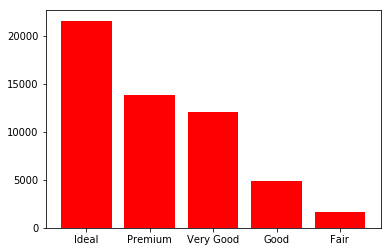

In [28]:
plt.bar(x      = cut_frequency.index,
         height = cut_frequency.values,
         color  = "red")
plt.show()

In [22]:
# 원그래프
# matplotlib.pyplot.pie (x            = "frequency or percent",
#                        Labels       = "Labels",
#                        radius       =   ,
#                        counterclock =   ,
#                        startangle   = )
# x : 원조각의 크기, frequency or percent
# Labels : 원조각의 이름
# radius : 반지름
# counterclock : 반시계방향 or 시계방향
# startangle : 첫번째 조각의 시작
# matplotlib.pyplot.show ()

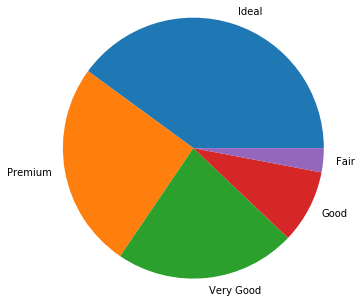

In [36]:
plt.pie (x      = cut_frequency.values,
         labels = cut_frequency.index,         
         radius = 1.5)
plt.show()

## 2. 일변량 양적자료 (수치형 자료) 분석

In [33]:
# 2.1 그래프
# (1) 히스토그램
# (2) 상자그림

In [34]:
# 히스토그램 (Histogram)
# matplotlib.pyplot.hist (x = variables, bins = 구간의 정보 또는 구간의 갯수)
# matplotlib.pyplot.show ()

<function matplotlib.pyplot.show(close=None, block=None)>

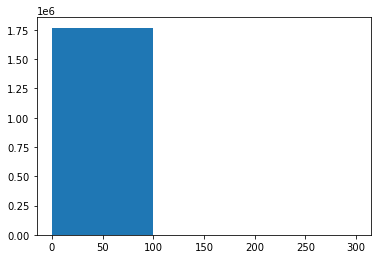

In [38]:
plt.hist (x = diamonds.DSP_CNT_IDEX, bins = [0, 100, 200, 300])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

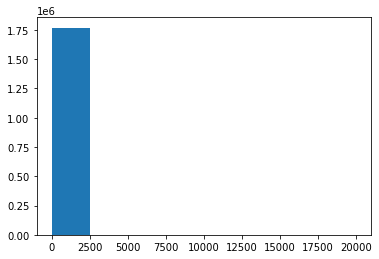

In [40]:
plt.hist (x = diamonds.DSP_CNT_IDEX, bins = [0, 2500, 5000, 7500, 10000, 12500, 15000,17500, 20000])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

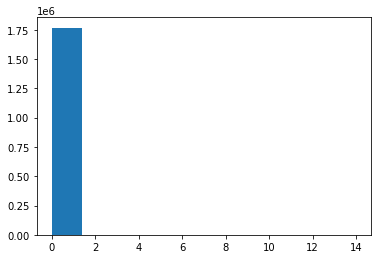

In [41]:
plt.hist(x  = diamonds.DSP_CNT_IDEX)
plt.show

In [ ]:
# 상자그림 (Boxplot)
# outlier가 있는지 확인하는 것이 주 목적
# matplotlib.pyplot.boxplot (x    = variables, 
#                            whis = 1.5)
# matplotlib.pyplot.show ()

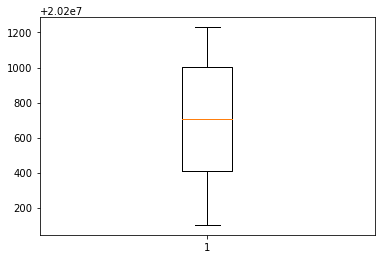

In [44]:
plt.boxplot (x = diamonds.YMD)
plt.show()

In [46]:
# 2.2 기술통계량 = 요약통계량
# (1) 중심 = 대푯값 : 평균
# (2) 퍼짐 = 산포 = 다름
# (3) 분포의 모양

In [47]:
# 중심 = 대표값

In [48]:
# i. 평균 (Mean)
# numpy.mean (data.variable)
np.mean(diamonds.price)

3932.799721913237

In [49]:
# ii. 중위수 = 중앙값 (median)
# numpy.median (data.variable)
np.median(diamonds.price)

2401.0

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

In [46]:
df = pd.read_csv("구급출동.csv")

In [47]:
import datetime

# 요일 0 ~ 6 정수값 return (월요일 ~ 일요일)
def get_weekday(ymd):
    yyyy = int(ymd/10000)
    mm = int(ymd%10000/100)    
    dd = int(ymd%10000%100)  
    return datetime.date(yyyy,mm,dd).weekday()

## apply 함수
df["MONTH"] = df["YMD"].apply(lambda x : int(x%10000/100) )
df["DAY"] = df["YMD"].apply(lambda x : int(x%10000%100) )
df["WEEKDAY"] = df["YMD"].apply(get_weekday)

df

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,TIME,YMD,STDG_CD,FP_IDEX,OLD_FP_IDEX,RELIFPLC_DWL_IDEX,RELIFPLC_ROAD_IDEX,RELIFPLC_INDUST_IDEX,RELIFPLC_NTR_IDEX,RELIFPLC_ETC_IDEX,DSP_CNT_IDEX,DISEASE_DSP_IDEX,DISEASE_EXCL_DSP_IDEX,MONTH,DAY,WEEKDAY
0,38045314,380475,531475,0,20200101,4213000000,2.88,0.72,0,0,0,0,0,0,0,0,1,1,2
1,38045324,380475,532475,0,20200101,4213000000,9.36,1.44,0,0,0,0,0,0,0,0,1,1,2
2,38145354,381475,535475,0,20200101,4213000000,3.93,0.15,0,0,0,0,0,0,0,0,1,1,2
3,38245184,382475,518475,0,20200101,4213000000,2.69,0.16,0,0,0,0,0,0,0,0,1,1,2
4,38245194,382475,519475,0,20200101,4213000000,2.35,0.14,0,0,0,0,0,0,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769073,40245274,402475,527475,23,20201230,4213000000,25.48,1.04,0,0,0,0,0,0,0,0,12,30,2
1769074,40545364,405475,536475,23,20201230,4213000000,1.21,0.32,0,0,0,0,0,0,0,0,12,30,2
1769075,40645144,406475,514475,23,20201230,4213000000,1.28,0.30,0,0,0,0,0,0,0,0,12,30,2
1769076,40745144,407475,514475,23,20201230,4213000000,6.17,1.47,0,0,0,0,0,0,0,0,12,30,2


In [50]:
import numpy as np

# 격자 ID 기준으로 DSP_CNT_IDEX 값을 SUM 기준으로 데이터 변환
rect_table = pd.pivot_table(df, values= "DSP_CNT_IDEX" , index=['GRID_ID'], aggfunc=np.sum)

rect_table["GRID_ID"] = rect_table.index.values
rect_table

,DSP_CNT_IDEX,GRID_ID
GRID_ID,,
37645864,1,37645864
37745114,23,37745114
37745124,8,37745124
37745144,4,37745144
37745154,13,37745154
...,...,...
44145094,1,44145094
44945564,1,44945564
45045614,1,45045614


In [51]:
## 격자 중에 출동이 50 번이 넘게 COUNT 되는 격자 추출 = 46개 격자
many_dsp = np.where(rect_table["DSP_CNT_IDEX"] > 50)[0]
many_dsp , len(rect_table.values[many_dsp])

(array([121, 145, 146, 171, 268, 340, 342, 365, 368, 369, 370, 371, 394,
        395, 396, 397, 398, 399, 400, 402, 419, 420, 421, 422, 423, 425,
        426, 428, 436, 437, 438, 439, 440, 441, 442, 443, 444, 447, 455,
        456, 457, 458, 475, 477, 497, 621], dtype=int64),
 46)

In [52]:
# 격자 중에 출동이 50 번이 넘게 COUNT 되는 격자 GRID_ID 값들
many_dsp_GRID_ID = rect_table.index.values[many_dsp]
many_dsp_GRID_ID

array([38345224, 38445234, 38445244, 38545244, 38945304, 39245194,
       39245214, 39345224, 39345254, 39345264, 39345274, 39345284,
       39445244, 39445254, 39445264, 39445274, 39445284, 39445294,
       39445304, 39445324, 39545244, 39545254, 39545264, 39545274,
       39545284, 39545304, 39545314, 39545334, 39645234, 39645244,
       39645254, 39645264, 39645274, 39645284, 39645294, 39645304,
       39645314, 39645344, 39745234, 39745244, 39745254, 39745264,
       39845244, 39845264, 39945254, 40745144], dtype=int64)

In [53]:
many_dsp_df = df[df["GRID_ID"].apply(lambda x :  x in many_dsp_GRID_ID)]

# 38만 ROW 데이터
many_dsp_df

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,TIME,YMD,STDG_CD,FP_IDEX,OLD_FP_IDEX,RELIFPLC_DWL_IDEX,RELIFPLC_ROAD_IDEX,RELIFPLC_INDUST_IDEX,RELIFPLC_NTR_IDEX,RELIFPLC_ETC_IDEX,DSP_CNT_IDEX,DISEASE_DSP_IDEX,DISEASE_EXCL_DSP_IDEX,MONTH,DAY,WEEKDAY
12,38345224,383475,522475,0,20200101,4213000000,4.18,0.34,0,0,0,0,0,0,0,0,1,1,2
19,38445234,384475,523475,0,20200101,4213000000,340.74,28.71,0,0,0,0,0,0,0,0,1,1,2
20,38445244,384475,524475,0,20200101,4213000000,156.82,9.65,0,0,0,0,0,0,0,0,1,1,2
27,38545244,385475,524475,0,20200101,4213000000,219.92,13.15,0,0,0,0,0,0,0,0,1,1,2
49,38945304,389475,530475,0,20200101,4213000000,51.71,1.40,0,0,0,0,0,0,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769032,39745264,397475,526475,23,20201230,4213000000,3865.51,331.79,0,0,0,0,0,0,0,0,12,30,2
1769045,39845244,398475,524475,23,20201230,4213000000,984.48,48.15,0,0,0,0,0,0,0,0,12,30,2
1769047,39845264,398475,526475,23,20201230,4213000000,516.59,67.30,0,0,0,0,0,0,0,0,12,30,2
1769057,39945254,399475,525475,23,20201230,4213000000,1415.55,84.09,0,0,0,0,0,0,0,0,12,30,2


In [59]:
# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(df,2,["DSP_CNT_IDEX"])

In [ ]:
df.loc[Outliers_to_drop] # Show the outliers rows

# 상관관계 분석

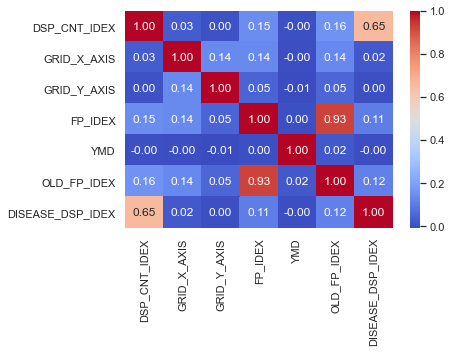

In [65]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
g = sns.heatmap(df[["DSP_CNT_IDEX","GRID_X_AXIS","GRID_Y_AXIS","FP_IDEX", "YMD","OLD_FP_IDEX","DISEASE_DSP_IDEX" ]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

only 'FP_IDEX' 만이 'DSP_CNT_IDEX'와 유의미한 correlation이 있다는 것을 확인할 수 있다. 
날짜 와는 아무 상관이 없다는 것을 확인

<AxesSubplot:>

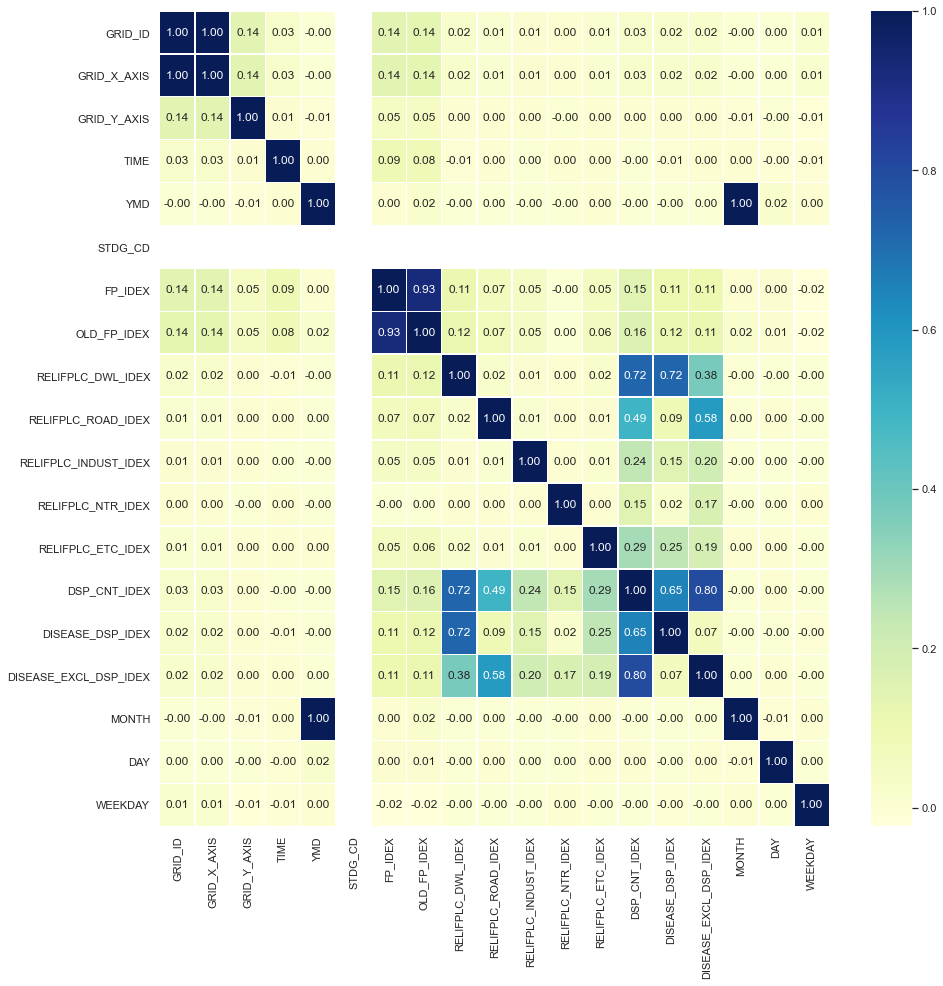

In [68]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='YlGnBu')


우리는 DSP_CNT_IDEX를 집중적으로 봐야하는데, DSP_CNT_IDEX와 유의미한 correlation을 가지는 칼럼들은 RELIFPLC_DWL_IDEX, RELIFPLC_ROAD_IDEX, RELIFPLC_INDUST_IDEX, RELIFPLC_NTRL_IDEX, RELIFPLC_ETC_IDEX, DISEASE_DSP_IDEX, DISEASE_EXCL_DSP_IDEX 정도이다.
그러나 우리는 주최자측에서 제시한 정답을 유추하기 위해서 위 칼럼들은 별로 신경을 크게 안써도 되는 칼럼들이다. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51648 missing 

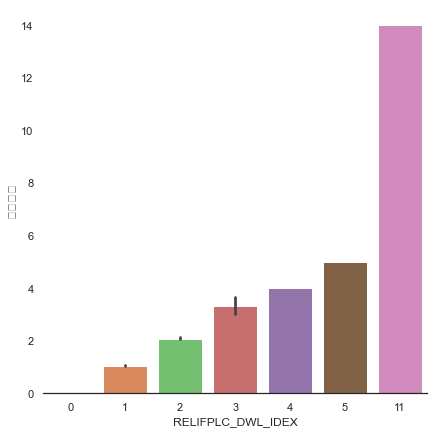

In [72]:
# Explore SibSp feature vs Survived
g = sns.factorplot(x="RELIFPLC_DWL_IDEX",y="DSP_CNT_IDEX",data=df,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("출동지수")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


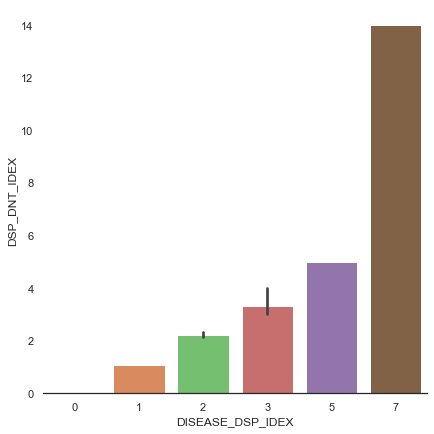

In [73]:
# Explore SibSp feature vs Survived
g = sns.factorplot(x="DISEASE_DSP_IDEX",y="DSP_CNT_IDEX",data=df,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("DSP_DNT_IDEX")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

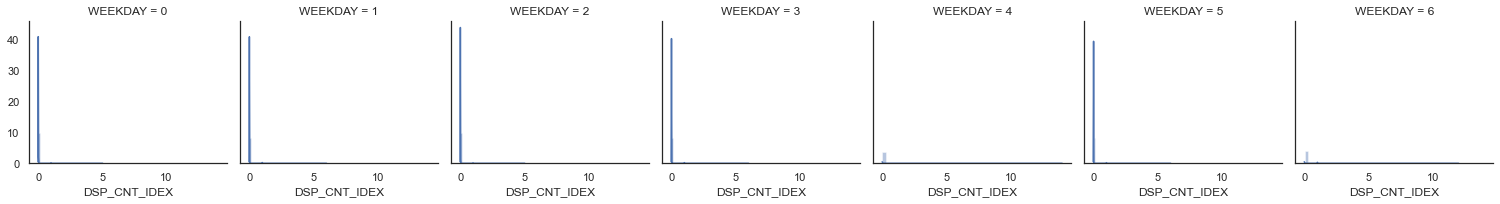

In [78]:
# Explore Age vs Survived
g = sns.FacetGrid(df, col='WEEKDAY')
g = g.map(sns.distplot, "DSP_CNT_IDEX")